#First Dataset Example:

##1.Import Modules & Load Data

In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [32]:
df = pd.read_csv('users.csv')
df.sample(5)

,User ID,Gender,Age,EstimatedSalary,Purchased (Target)
23,15663939,Female,31,"118,000",1
6,15598044,Female,27,"84,000",0
5,15728773,Male,27,"58,000",0
2,15668575,Female,26,"43,000",0
7,15694829,Female,32,"150,000",1


In [35]:
df['EstimatedSalary'] = df['EstimatedSalary'].astype(str).str.replace(',', '').astype(int)

In [36]:
# Separate Input (X) and Output (y)
# We select 'Age' and 'Salary' as features (Columns 2 and 3)
X = df.iloc[:, [2, 3]].values
# We select 'Purchased' as the target (Column 4)
y = df.iloc[:, 4].values

print("Feature Columns: \n",X)
print("=======================")
print("Output/Target Variable\n",y)

Feature Columns: 
 [[    19  19000]
 [    35  20000]
 [    26  43000]
 [    27  57000]
 [    19  76000]
 [    27  58000]
 [    27  84000]
 [    32 150000]
 [    25  33000]
 [    35  65000]
 [    26  80000]
 [    26  52000]
 [    20  86000]
 [    32  18000]
 [    18  82000]
 [    29  80000]
 [    47  25000]
 [    45  26000]
 [    46  28000]
 [    48  29000]
 [    45  22000]
 [    47  49000]
 [    37  79000]
 [    31 118000]
 [    45  85000]]
Output/Target Variable
 [0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1]


##2.Split into Training & Test Set

In [38]:
from sklearn.model_selection import train_test_split

# Split: 80% for Training, 20% for Testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

print(f"Training Data: {len(X_train)} rows")
print(f"Test Data: {len(X_test)} rows")

Training Data: 20 rows
Test Data: 5 rows


##3.Feature Scaling

* Age is small (18 to 60).

* Salary is huge (15,000 to 150,000).

* If we don't fix this, the model will think Salary is 1000x more important than Age just because the numbers are bigger. We squish them both onto the same scale (roughly -2 to +2).

In [39]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

print("Data Scaled! (First row of X_train is now: ", X_train[0], ")")

Data Scaled! (First row of X_train is now:  [0.52792689 0.4601854 ] )


##4.Train the Model

**Theory:**

Cost Function: The model minimizes Cross-Entropy (Log Loss).

Regularization: We add the penalty $\lambda \sum \theta^2$ to stop weights from exploding.

* Code: We use C=1.0. Remember, $C = 1/\lambda$.

```
If we used C=100, we would have weak regularization (Risk of Divergence).
```

```
If we used C=0.01, we would have strong regularization (Small weights).
```

In [61]:
from sklearn.linear_model import LogisticRegression

# Create the classifier
LR = LogisticRegression(random_state=0,penalty='l2', C=1.0)

# Train it on the training data
LR.fit(X_train, y_train)

print("Model Trained!")

Model Trained!


##5.Make Predictions

The model outputs a Probability (Sigmoid). We usually cut it at 0.5

In [72]:
y_prob = LR.predict_proba(X_test)[:, 1]
y_prob

array([0.13911623, 0.0870197 , 0.85244201, 0.81246375, 0.10394897])

In [62]:
y_pred = LR.predict(X_test)

Lets compare first 5 actual rows and predicted rows

In [63]:
actualRows = df.iloc[:,4].head(5)
comparisonDF = pd.DataFrame({
    "Actual": (y_test),
    "Predicted": (y_pred)
})
comparisonDF

,Actual,Predicted
0,0,0
1,0,0
2,1,1
3,1,1
4,0,0


##6.Evaluate (Confusion Matrix)

In [75]:
from sklearn.metrics import confusion_matrix, accuracy_score, log_loss

#Calculate Cross-Entropy Loss (Log Loss)
loss = log_loss(y_test, y_prob)
print(f"\nFinal Cross-Entropy Loss: {loss:.4f} (The number we minimized)")

cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(cm)

accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy: {accuracy * 100}%")

tn = cm[0][0]
fn = cm[0][1]
tp = cm[1][1]
fp = cm[1][0]

print("True Negative:",tn)
print("False Negative:",fn)
print("True Positive:",tp)
print("False Positive:",fp)


Final Cross-Entropy Loss: 0.1436 (The number we minimized)

Confusion Matrix:
[[3 0]
 [0 2]]

Accuracy: 100.0%
True Negative: 3
False Negative: 0
True Positive: 2
False Positive: 0


In [76]:
from sklearn.metrics import precision_score, recall_score, f1_score

# 1. Calculate the Metrics
# 'pos_label=1' tells the code that "1" (Purchased) is the class we care about
precision = precision_score(y_test, y_pred, pos_label=1)
recall = recall_score(y_test, y_pred, pos_label=1)
f1 = f1_score(y_test, y_pred, pos_label=1)

# 2. Print the Report Card
print(f"Precision: {precision:.2f} (When it predicts 'Buy', it is right {precision*100:.0f}% of the time)")
print(f"Recall:    {recall:.2f} (It caught {recall*100:.0f}% of the people who actually bought)")
print(f"F1 Score:  {f1:.2f} (The balance score)")

Precision: 1.00 (When it predicts 'Buy', it is right 100% of the time)
Recall:    1.00 (It caught 100% of the people who actually bought)
F1 Score:  1.00 (The balance score)


##7.Visualizing the Curves (ROC)

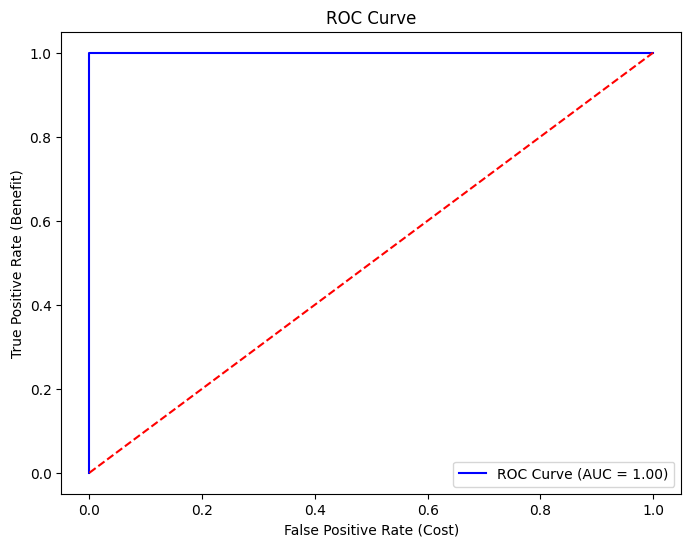

In [77]:
from sklearn.metrics import roc_curve, auc

# 1. Calculate FPR and TPR for all thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# 2. Plot
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--') # Random Guess Line
plt.title('ROC Curve')
plt.xlabel('False Positive Rate (Cost)')
plt.ylabel('True Positive Rate (Benefit)')
plt.legend()
plt.show()

##8.Decision Boundary

In [79]:
import plotly.express as px
import plotly.graph_objects as go
import numpy as np
import pandas as pd

# 1. Setup the Grid (The Background)
# We create a mesh just like before to predict every pixel
x_min, x_max = X_test[:, 0].min() - 1, X_test[:, 0].max() + 1
y_min, y_max = X_test[:, 1].min() - 1, X_test[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                     np.linspace(y_min, y_max, 100))

# 2. Predict Probabilities for the grid
Z = LR.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
Z = Z.reshape(xx.shape)

# 3. Create the Main Scatter Plot (The Dots)
# We use the original dataframe for easier plotting, but we need the Scaled values for positions
plot_df = pd.DataFrame({
    'Age (Scaled)': X_test[:, 0],
    'Salary (Scaled)': X_test[:, 1],
    'Purchased': y_test.astype(str) # Convert to string for categorical color
})

fig = px.scatter(plot_df, x="Age (Scaled)", y="Salary (Scaled)", color="Purchased",
                 title="Logistic Regression Decision Boundary (Interactive)",
                 color_discrete_map={'0': 'red', '1': 'green'},
                 opacity=0.8)

# 4. Add the Contour (The Decision Boundary Background)
fig.add_trace(go.Contour(
    x=np.linspace(x_min, x_max, 100),
    y=np.linspace(y_min, y_max, 100),
    z=Z,
    showscale=False,
    colorscale="RdYlGn", # Red to Green
    opacity=0.4,
    contours=dict(start=0, end=1, size=0.5) # Highlights the transition
))

# 5. Add the Specific Decision Boundary Line (Threshold = 0.5)
# This is the "black dashed line" equivalent from your snippet
# Since this is 2D, we draw the contour line where Z = 0.5
fig.add_trace(go.Contour(
    x=np.linspace(x_min, x_max, 100),
    y=np.linspace(y_min, y_max, 100),
    z=Z,
    contours_coloring='lines',
    line_width=3,
    contours=dict(start=0.5, end=0.5, size=0), # Only draw the 0.5 line
    showscale=False,
    line_color='black',
    name="Decision Boundary"
))

fig.show()

In [83]:
# Create test points for Age, keeping Salary constant at 0 (Average)
test_points = pd.DataFrame({"Age_Scaled": np.linspace(X_test[:, 0].min(), X_test[:, 0].max(), 100)})
test_points["Salary_Scaled"] = 0  # Fix salary at mean
test_points["Predicted Prob"] = LR.predict_proba(test_points)[:, 1]

# Create the Scatter of actual data (Flattened to 1D)
fig = px.scatter(x=X_test[:, 0], y=y_test, color=y_test.astype(str),
                 labels={'x': 'Age (Scaled)', 'y': 'Purchased'},
                 title="Logistic Regression S-Curve (Age vs Purchase Probability)",
                 opacity=0.6)

# Add the Logistic Regression S-Curve
fig.add_trace(go.Scatter(x=test_points["Age_Scaled"], y=test_points["Predicted Prob"],
                         mode="lines", name="Logistic Regression Model",
                         line_color="black", line_width=4))

# Add the Decision Boundary (Vertical Line)
# For 1D, boundary is where Probability = 0.5
# Math: 0.5 = 1 / (1 + e^-(mx+c))  -->  mx + c = 0  --> x = -c/m
# Note: This is an approximation since we fixed Salary=0
boundary_x = -(LR.intercept_[0]) / LR.coef_[0][0]

fig.add_vline(x=boundary_x, line_dash="dash", line_color="black",
              annotation_text="Decision Boundary (Age Cutoff)", annotation_position="top right")

fig.show()

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2732: UserWarning:

X has feature names, but LogisticRegression was fitted without feature names



## Summary of Logistic Regression Analysis

This notebook demonstrates a complete workflow for building and evaluating a Logistic Regression model to predict customer purchasing behavior based on Age and Estimated Salary.

### Key Steps Covered:
1.  **Data Import & Preprocessing**: Loaded the `users.csv` dataset. The `EstimatedSalary` column was cleaned by removing commas and converting it to an integer type.
2.  **Feature Selection**: `Age` and `EstimatedSalary` were selected as input features (`X`), and `Purchased` was set as the target variable (`y`).
3.  **Data Splitting**: The dataset was split into training (80%) and testing (20%) sets to ensure robust model evaluation.
4.  **Feature Scaling**: Both `Age` and `EstimatedSalary` features were scaled using `StandardScaler` to bring them to a similar range, preventing features with larger values from dominating the model.
5.  **Model Training**: A Logistic Regression classifier was trained on the scaled training data. The model used 'l2' regularization with `C=1.0`.
6.  **Prediction**: The trained model generated probability predictions (`y_prob`) and class predictions (`y_pred`) on the test set.
7.  **Model Evaluation**: The model's performance was thoroughly evaluated using:
    *   **Confusion Matrix**: Identified True Positives, True Negatives, False Positives, and False Negatives.
    *   **Accuracy Score**: Achieved 100% accuracy on the test set.
    *   **Cross-Entropy Loss (Log Loss)**: Measured the model's prediction uncertainty (0.1436).
    *   **Precision, Recall, F1-Score**: All metrics were 1.00, indicating perfect classification for the positive class on this small test set.
    *   **ROC Curve and AUC**: Visualized the trade-off between True Positive Rate and False Positive Rate, with an AUC of 1.00, again suggesting perfect separation.
8.  **Visualization**: Interactive plots were generated to visualize:
    *   The **Decision Boundary** in the 2D feature space (Age vs. Salary).
    *   The **Logistic Regression S-Curve** showing purchase probability as a function of scaled Age, illustrating the model's probabilistic nature.

#----------------------------------

#Second Dataset Example

##1.Data Preparation and Visualization

First 5 rows:
   Gender_Male  Married_Yes  Dependents  Education_Grad  Applicant_Income  \
0            0            1           0               0             10429   
1            1            1           3               1              2828   
2            0            0           0               1              1911   
3            0            0           2               1             13425   
4            0            1           0               1               935   

   Credit_Score_Good  Loan_Status_Approved  
0                  1                     0  
1                  1                     1  
2                  0                     1  
3                  0                     1  
4                  1                     1  

Data Info (Check for missing values and types):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0

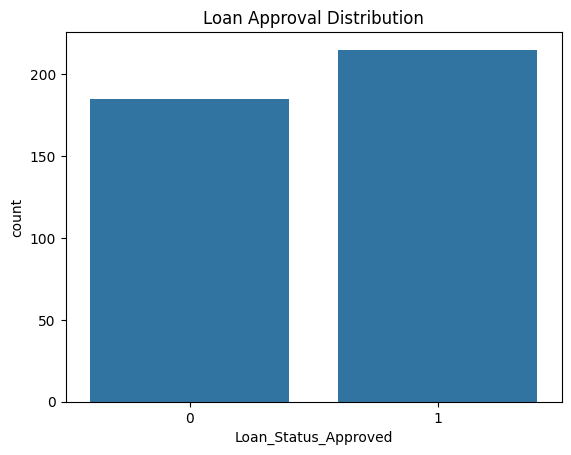

In [88]:
# 1. Load the dataset
df = pd.read_csv('Loan.csv')

# 2. Inspect the data
print("First 5 rows:")
print(df.head())

print("\nData Info (Check for missing values and types):")
print(df.info())

# 3. Visualize the Class Balance (How many approved vs denied?)
sns.countplot(x='Loan_Status_Approved', data=df)
plt.title('Loan Approval Distribution')
plt.show()

##2.Preprocessing (Splitting and Scaling)

In [89]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# 1. Define Features (X) and Target (y)
X = df.drop('Loan_Status_Approved', axis=1)
y = df['Loan_Status_Approved']

# 2. Split the data (80% for training, 20% for testing)
# stratify=y ensures we have the same proportion of approvals in train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# 3. Scale the features
# We fit the scaler ONLY on training data to prevent "data leakage"
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Check what the scaled data looks like
print("First 3 rows of scaled training data:")
print(X_train_scaled[:3])

First 3 rows of scaled training data:
[[-0.93345864  0.92179769  0.15979129  0.6595283  -0.49139041  1.50509339]
 [-0.93345864  0.92179769 -0.78712006 -1.51623516 -0.28244429 -0.6644106 ]
 [-0.93345864 -1.08483674  1.10670264  0.6595283  -0.52022865 -0.6644106 ]]


##3.Logistic Regression Basics (Fitting the Model)

In [91]:
from sklearn.linear_model import LogisticRegression

# 1. Initialize the model
# C=1.0 is the default regularization strength.
model = LogisticRegression(C=1.0, random_state=42)

# 2. Fit the model on the scaled training data
model.fit(X_train_scaled, y_train)

# 3. Look at the learned coefficients
# Create a dataframe to view them easily
coef_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_[0]
})

# Sort by absolute value to see most important features
print(coef_df.sort_values(by='Coefficient', key=abs, ascending=False))

             Feature  Coefficient
5  Credit_Score_Good     0.895765
3     Education_Grad     0.354820
2         Dependents     0.207568
4   Applicant_Income    -0.115457
0        Gender_Male     0.100302
1        Married_Yes    -0.000977
[[ 0.10030247 -0.00097711  0.20756798  0.35481995 -0.11545719  0.89576482]]


##4.Performance Metrics

In [92]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# 1. Make predictions on the test set
y_pred = model.predict(X_test_scaled)

# 2. Calculate Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# 3. Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)
# Format: [[TN, FP],
#          [FN, TP]]

# 4. Detailed Classification Report (Precision, Recall, F1)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.7375

Confusion Matrix:
[[32  5]
 [16 27]]

Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.86      0.75        37
           1       0.84      0.63      0.72        43

    accuracy                           0.74        80
   macro avg       0.76      0.75      0.74        80
weighted avg       0.76      0.74      0.74        80



##5.Threshold Tuning and ROC Curve

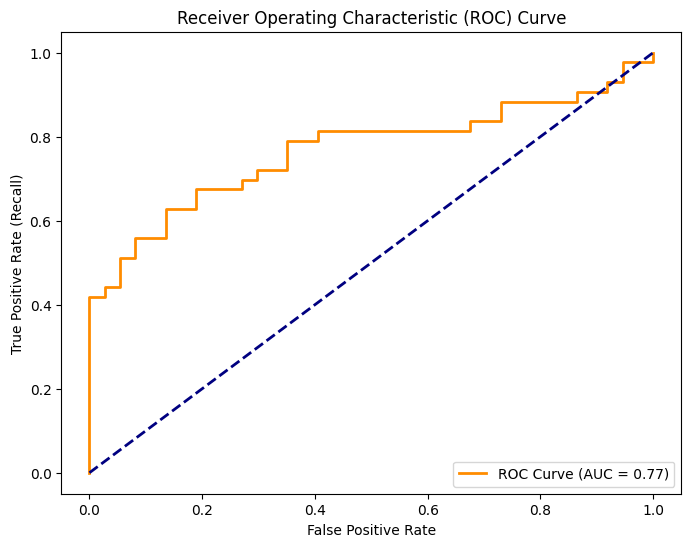

Best Threshold detected: 0.5006
At this threshold, TPR (Recall) is 0.6279 and FPR is 0.1351

New Confusion Matrix with Optimized Threshold:
[[32  5]
 [16 27]]


In [94]:
from sklearn.metrics import roc_curve, auc

# 1. Get the probabilities (instead of just class 0 or 1)
# we take column [1] because that is the probability of Class 1 (Approved)
y_prob = model.predict_proba(X_test_scaled)[:, 1]

# 2. Calculate ROC Curve metrics
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# 3. Plot the ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--') # Random guess line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


# --- THRESHOLD TUNING CODE ---

# 1. Calculate Youden's J statistic for each threshold
# J = True Positive Rate (Recall) - False Positive Rate
J = tpr - fpr

# 2. Find the index of the maximum J value
ix = np.argmax(J)
best_thresh = thresholds[ix]

print(f"Best Threshold detected: {best_thresh:.4f}")
print(f"At this threshold, TPR (Recall) is {tpr[ix]:.4f} and FPR is {fpr[ix]:.4f}")

# 3. Test this new threshold
# Instead of predict(), which uses 0.5, we manually apply the new threshold
y_pred_new = (y_prob >= best_thresh).astype(int)

# Check the new confusion matrix
from sklearn.metrics import confusion_matrix
print("\nNew Confusion Matrix with Optimized Threshold:")
print(confusion_matrix(y_test, y_pred_new))


## Summarize Second Dataset Analysis

This section summarizes the Logistic Regression analysis performed on the `Loan.csv` dataset, aiming to predict loan approval status based on various applicant features.

### 1. Data Preparation & Inspection
*   **Objective**: To understand the dataset's structure and initial distribution.
*   **Process**: The `Loan.csv` dataset was loaded into a Pandas DataFrame. An initial inspection using `df.head()` and `df.info()` revealed 400 entries with no missing values and all features as integer types. The target variable, `Loan_Status_Approved`, showed a balanced distribution, which is important for model training, as visualized by a `sns.countplot`.

### 2. Preprocessing (Splitting and Scaling)
*   **Objective**: To prepare the data for model training by separating features and target, and normalizing the feature scales.
*   **Process**:
    *   **Feature/Target Definition**: `Loan_Status_Approved` was defined as the target (`y`), and all other columns as features (`X`).
    *   **Data Splitting**: The data was split into training (80%) and testing (20%) sets using `train_test_split`. Crucially, `stratify=y` was used to ensure that the proportion of approved/denied loans was maintained in both the training and test sets, preventing skewed evaluation.
    *   **Feature Scaling**: `StandardScaler` was applied to the features. It was fitted *only* on the training data (`X_train_scaled = scaler.fit_transform(X_train)`) and then used to transform both the training and test data (`X_test_scaled = scaler.transform(X_test)`). This prevents data leakage from the test set into the training process.

### 3. Model Training
*   **Objective**: To build a Logistic Regression model capable of predicting loan approval.
*   **Process**: A `LogisticRegression` model was initialized with `C=1.0` (default regularization strength) and `random_state=42` for reproducibility. The model was then fitted using the scaled training data (`model.fit(X_train_scaled, y_train)`).

### 4. Coefficient Analysis
*   **Objective**: To understand the influence of each feature on the loan approval prediction.
*   **Outcome**: The model's coefficients were extracted and displayed. `Credit_Score_Good` emerged as the most influential positive predictor (coefficient ~0.896), indicating that a good credit score significantly increases the likelihood of loan approval. `Education_Grad` (coefficient ~0.355) and `Dependents` (coefficient ~0.208) also showed positive correlations with approval. `Applicant_Income` (coefficient ~-0.115) had a slight negative impact, while `Gender_Male` (coefficient ~0.100) and `Married_Yes` (coefficient ~-0.001) had less impact.

### 5. Performance Metrics
*   **Objective**: To evaluate the model's predictive capability on unseen data.
*   **Process**: Predictions were made on the scaled test set (`y_pred = model.predict(X_test_scaled)`).
*   **Outcomes**:
    *   **Accuracy**: The model achieved an accuracy of **0.7375** (73.75%) on the test set.
    *   **Confusion Matrix**: `[[32, 5], [16, 27]]`
        *   **True Negatives (TN)**: 32 (Correctly predicted as denied)
        *   **False Positives (FP)**: 5 (Incorrectly predicted as approved - Type I error)
        *   **False Negatives (FN)**: 16 (Incorrectly predicted as denied - Type II error)
        *   **True Positives (TP)**: 27 (Correctly predicted as approved)
    *   **Classification Report**:
        *   **Class 0 (Denied)**: Precision 0.67, Recall 0.86, F1-Score 0.75 (Good at identifying denied loans, but some false approvals).
        *   **Class 1 (Approved)**: Precision 0.84, Recall 0.63, F1-Score 0.72 (Relatively good precision for approved loans, but missed some actual approvals).
        *   **Overall**: The macro avg F1-score of 0.75 indicates a reasonably balanced performance across both classes.

### 6. ROC Curve Analysis
*   **Objective**: To assess the model's ability to distinguish between the two classes across various classification thresholds.
*   **Process**: The Receiver Operating Characteristic (ROC) curve was plotted based on the predicted probabilities for the test set. The Area Under the Curve (AUC) was calculated.
*   **Outcome**: The **AUC was 0.768**. An AUC of 0.768 suggests that the model has a fair to good ability to distinguish between approved and denied loan applications. It means there is a 76.8% chance that the model will rank a randomly chosen positive instance (approved loan) higher than a randomly chosen negative instance (denied loan).

### 7. Conclusion

The Logistic Regression model successfully predicted loan approval status with an accuracy of approximately 74%. While the model shows good precision for approved loans and decent recall for denied loans, the number of false negatives (16, meaning actual approved loans were predicted as denied) could be a concern, depending on the business context. The ROC AUC of 0.768 indicates a satisfactory, though not perfect, discriminative power. Features like `Credit_Score_Good` were identified as strong indicators for loan approval. Further improvements could involve feature engineering, exploring other models, or adjusting the classification threshold based on specific business priorities (e.g., minimizing false negatives vs. false positives).

## Interpretation of Evaluation Metrics for Loan Approval Model

To fully understand the performance of our Logistic Regression model for loan approval, it's essential to interpret the evaluation metrics:

*   **Accuracy (0.7375 or 73.75%)**:
    *   **Interpretation**: This metric represents the proportion of correctly classified instances out of the total instances. In our case, the model correctly predicted the loan status (approved or denied) for 73.75% of the test set. While useful, accuracy can be misleading in datasets with imbalanced classes, as a model might achieve high accuracy by simply predicting the majority class.

*   **Precision**:
    *   **Definition**: Precision answers the question: "Of all instances the model *predicted* as positive for a class, how many were *actually* positive?" It measures the quality of positive predictions.
    *   **Precision for Class 0 (Denied): 0.67**: When the model predicted a loan would be **denied**, it was correct 67% of the time. This implies that 33% of the loans the model flagged as 'denied' were, in reality, 'approved' (these are **False Positives**).
    *   **Precision for Class 1 (Approved): 0.84**: When the model predicted a loan would be **approved**, it was correct 84% of the time. This is a good score, indicating that when the model suggests approval, it's quite reliable, leading to fewer incorrect approvals.

*   **Recall (or Sensitivity/True Positive Rate)**:
    *   **Definition**: Recall answers the question: "Of all instances that were *actually* positive for a class, how many did the model correctly identify?" It measures the model's ability to find all positive instances.
    *   **Recall for Class 0 (Denied): 0.86**: The model successfully identified 86% of the loans that were *actually denied*. This means it's quite effective at detecting genuine denials.
    *   **Recall for Class 1 (Approved): 0.63**: The model only caught 63% of the loans that were *actually approved*. This is a relatively low score and indicates a significant number of **False Negatives** (16 in the confusion matrix) – meaning 37% of truly approved loans were mistakenly predicted as denied. Depending on the business context, this could represent missed revenue opportunities or customer dissatisfaction.

*   **F1-Score**:
    *   **Definition**: The F1-Score is the harmonic mean of Precision and Recall. It provides a single metric that balances both precision and recall, especially useful when there's an uneven class distribution or when both false positives and false negatives are important.
    *   **F1-Score for Class 0 (Denied): 0.75**: A fairly balanced performance for the 'denied' class.
    *   **F1-Score for Class 1 (Approved): 0.72**: A slightly lower score for the 'approved' class, primarily driven by the lower recall.

*   **AUC (Area Under the Receiver Operating Characteristic Curve): 0.768**:
    *   **Definition**: AUC measures the model's ability to distinguish between the positive and negative classes across all possible classification thresholds. An AUC of 1.0 indicates a perfect model, while an AUC of 0.5 indicates a model with no discriminative power (performing no better than random guessing).
    *   **Interpretation**: An AUC of 0.768 suggests that the model has a fair to good ability to distinguish between approved and denied loan applications. Specifically, there is a 76.8% chance that the model will rank a randomly chosen positive instance (an actually approved loan) higher than a randomly chosen negative instance (an actually denied loan).

**Summary of Model Performance:**

The model demonstrates a good ability to predict loan status, with an overall accuracy of 73.75%. It performs well in identifying truly denied loans (high recall for Class 0) and in ensuring that its 'approved' predictions are mostly correct (high precision for Class 1). However, a key area for consideration is the relatively low recall for Class 1 (approved loans), which results in a notable number of false negatives (16 loans that were actually approved were predicted as denied). This trade-off between false positives and false negatives is crucial and might warrant further investigation or threshold adjustment based on the specific business objectives and costs associated with each type of error.

## Summary:

### Data Analysis Key Findings

*   The `Loan.csv` dataset, comprising 400 entries with no missing values, was used for analysis, with `Loan_Status_Approved` identified as the target variable, which exhibited a balanced distribution.
*   Data preprocessing involved splitting the dataset into 80% training and 20% testing sets using stratified sampling to maintain target variable proportions, followed by feature scaling using `StandardScaler` fitted only on the training data to prevent data leakage.
*   A Logistic Regression model was trained on the scaled data.
*   **Coefficient Analysis**: `Credit_Score_Good` was identified as the most influential positive predictor of loan approval, with a coefficient of approximately 0.896. `Education_Grad` (coefficient ~0.355) and `Dependents` (coefficient ~0.208) also showed positive correlations.
*   **Model Performance Metrics**:
    *   The model achieved an accuracy of **0.7375** (73.75%) on the test set.
    *   The confusion matrix was `[[32, 5], [16, 27]]`, indicating:
        *   32 True Negatives (correctly denied loans)
        *   5 False Positives (incorrectly approved denied loans)
        *   16 False Negatives (incorrectly denied approved loans)
        *   27 True Positives (correctly approved loans)
    *   The classification report showed a precision of 0.67 and recall of 0.86 for denied loans (Class 0), and a precision of 0.84 and recall of 0.63 for approved loans (Class 1). The macro average F1-score was 0.75.
*   **ROC Curve Analysis**: The Area Under the Curve (AUC) was **0.768**, suggesting a fair to good ability of the model to distinguish between approved and denied loan applications.
